# Park accessibility from OSM data

Calculate park accessibilities from OSM data.

This examples calculates park accessibility for London using OpenStreetMap Polygon data.


In [1]:
from cityseer.metrics import layers
from cityseer.tools import graphs, io
import matplotlib.pyplot as plt
from osmnx import features

To start, follow the same approach as shown in the network examples to create the network.


In [2]:
lng, lat = -0.13396079424572427, 51.51371088849723
buffer = 1500
poly_wgs, epsg_code = io.buffered_point_poly(lng, lat, buffer)
G = io.osm_graph_from_poly(poly_wgs)
G_dual = graphs.nx_to_dual(G)
nodes_gdf, _edges_gdf, network_structure = io.network_structure_from_nx(G_dual)

INFO:cityseer.tools.graphs:Generating interpolated edge geometries.
100%|██████████| 24137/24137 [00:00<00:00, 37496.45it/s]
INFO:cityseer.tools.io:Converting networkX graph to CRS code 32630.
INFO:cityseer.tools.io:Processing node x, y coordinates.
100%|██████████| 22415/22415 [00:00<00:00, 1154695.70it/s]
INFO:cityseer.tools.io:Processing edge geom coordinates, if present.
100%|██████████| 24137/24137 [00:01<00:00, 16959.26it/s]
INFO:cityseer.tools.graphs:Removing filler nodes.
100%|██████████| 22415/22415 [00:00<00:00, 22903.16it/s]
INFO:cityseer.tools.util:Creating edges STR tree.
100%|██████████| 12164/12164 [00:01<00:00, 9631.88it/s] 
INFO:cityseer.tools.graphs:Removing filler nodes.
100%|██████████| 7384/7384 [00:00<00:00, 308323.04it/s]
INFO:cityseer.tools.graphs:Removing dangling nodes.
INFO:cityseer.tools.graphs:Removing filler nodes.
100%|██████████| 9004/9004 [00:00<00:00, 780295.32it/s]
INFO:cityseer.tools.util:Creating edges STR tree.
100%|██████████| 6651/6651 [00:00<00:

Prepare the parks GeoDataFrame by downloading the data from OpenStreetMap. The `osmnx` [`features_from_polygon`](https://osmnx.readthedocs.io/en/stable/user-reference.html#osmnx.features.features_from_polygon) works well for this purpose. In this instance, we are specifically targeting features that are labelled as a `leisure` type of `park`. You can use the same idea to extract other features or land use types.

It is important to convert the derivative GeoDataFrame to the same CRS as the network.


In [3]:
data_gdf = features.features_from_polygon(poly_wgs, tags={"leisure": ["park"]})
data_gdf = data_gdf.to_crs(nodes_gdf.crs)
# reset index
data_gdf = data_gdf.reset_index(level=0, drop=True)

data_gdf

,geometry,GBV,barrier,leisure,name,wikidata,wikimedia_commons,wikipedia,access,opening_hours,...,bottle,historic,loc_name,name:cy,name:zh,foot,name:ja,alt_name,type,surface
id,,,,,,,,,,,,,,,,,,,,,
5579381,"POLYGON ((699189.384 5709943.8, 699189.043 570...",NaN,NaN,park,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,multipolygon,grass
3241371,"POLYGON ((699470.032 5711728.944, 699463.775 5...",Active,fence,park,Russell Square,Q1346906,Category:Russell_Square_Gardens,en:Russell Square,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3241840,"POLYGON ((699136.323 5712190.801, 699139.55 57...",NaN,fence,park,Tavistock Square,Q1936696,NaN,en:Tavistock Square,permissive,07:30-sunset,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4075108,"POLYGON ((700241.772 5711256.088, 700243.597 5...",NaN,NaN,park,Lincoln's Inn,Q69482,NaN,en:Lincoln's Inn,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4081049,"POLYGON ((697602.375 5710597.115, 697665.44 57...",NaN,NaN,park,Grosvenor Square,Q932992,NaN,en:Grosvenor Square,yes,Mo-Su 07:30-dusk,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4082589,"POLYGON ((699169.133 5710522.521, 699170.334 5...",NaN,NaN,park,Leicester Square,Q848912,NaN,en:Leicester Square,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4253286,"POLYGON ((699082.827 5711964.714, 699083.941 5...",NaN,fence,park,Woburn Square,Q8028979,NaN,en:Woburn Square,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4253288,"POLYGON ((698963.988 5712061.606, 698963.808 5...",NaN,fence,park,Gordon Square,Q5585854,NaN,en:Gordon Square,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4253646,"POLYGON ((699584.927 5711815.931, 699611.882 5...",Active,fence,park,Queen Square Gardens,Q3414013,NaN,"en:Queen Square, London",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Once the data has been prepared, use the [`layers.compute_accessibilities`](https://cityseer.benchmarkurbanism.com/metrics/layers#compute-accessibilities) method to compute accessibilities. The `landuse_column_label` and the target accessibility keys should correspond to the data in the input GeoDataFrame. Use a larger number for `n_nearest_candidates` to handle large or elongated parks.


In [14]:
# compute pub accessibility
distances = [100, 200, 400, 800]
nodes_gdf, data_gdf = layers.compute_accessibilities(
    data_gdf,
    landuse_column_label="leisure",
    accessibility_keys=["park"],
    nodes_gdf=nodes_gdf,
    network_structure=network_structure,
    distances=distances,
    max_netw_assign_dist=200,
    n_nearest_candidates=1000,
)

INFO:cityseer.metrics.layers:Computing land-use accessibility for: park
INFO:cityseer.metrics.layers:Assigning data to network.
INFO:cityseer.data:Assigning 41 data entries to network nodes (max_dist: 200).
INFO:cityseer.data:Collected 355 potential node assignments from data entries.
INFO:cityseer.data:Finished assigning data. 355 assignments added to 331 nodes.
INFO:cityseer.graph:Barriers unset and R-tree cleared.
100%|██████████| 2852/2852 [00:01<00:00, 2805.96it/s]
INFO:cityseer.config:Metrics computed for:
INFO:cityseer.config:Distance: 100m, Beta: 0.04, Walking Time: 1.25 minutes.
INFO:cityseer.config:Distance: 200m, Beta: 0.02, Walking Time: 2.5 minutes.
INFO:cityseer.config:Distance: 400m, Beta: 0.01, Walking Time: 5.0 minutes.
INFO:cityseer.config:Distance: 800m, Beta: 0.005, Walking Time: 10.0 minutes.


The output columns are named `cc_{key}_{distance}_{type}`. Where the keys will correspond to the input accessibility keys and the distances will correspond to the input distances. The types will correspond to either non-weighted `nw` or distance weighted `wt` count, or else the distance to the nearest instance of a given landuse.

Standard GeoPandas functionality can be used to explore, visualise, or save the results.


In [9]:
nodes_gdf.columns

Index(['ns_node_idx', 'x', 'y', 'live', 'weight', 'primal_edge',
       'primal_edge_node_a', 'primal_edge_node_b', 'primal_edge_idx',
       'dual_node', 'cc_park_100_nw', 'cc_park_100_wt', 'cc_park_200_nw',
       'cc_park_200_wt', 'cc_park_400_nw', 'cc_park_400_wt', 'cc_park_800_nw',
       'cc_park_800_wt', 'cc_park_nearest_max_800'],
      dtype='object')

(np.float64(697035.8123208123),
 np.float64(700647.6928482385),
 np.float64(5709138.304744158),
 np.float64(5712549.39964246))

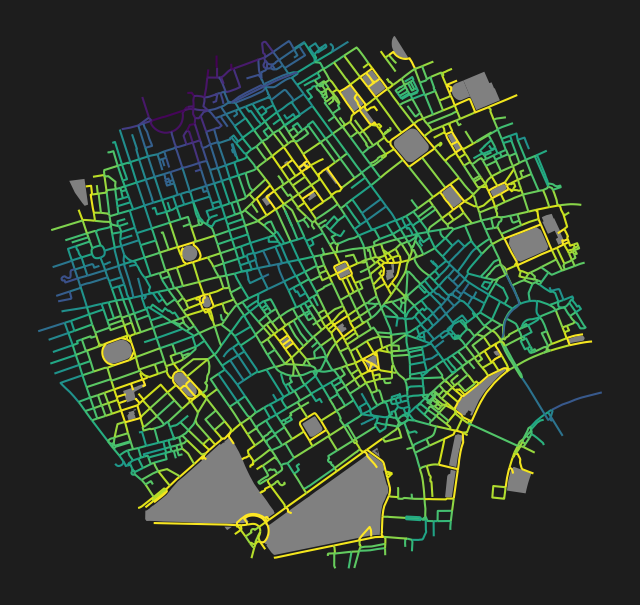

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8), facecolor="#1d1d1d")
nodes_gdf.plot(
    column="cc_park_nearest_max_800",
    cmap="viridis_r",
    legend=False,
    ax=ax,
)
data_gdf.plot(
    markersize=2,
    edgecolor=None,
    color="grey",
    legend=False,
    ax=ax,
)
ax.axis(False)
